# Tarea Integración MonteCarlo
## Carlos Andrés Granada Palacio. C.C: 1152468543

Uno de los métodos de integración de tipo MonteCarlo se basa en aquel resultado del cálculo integral que nos dice que se puede computar el valor medio de una función integrable en un intervalo usando su integral en dicho intervalo, más específicamente:

$$f_{av} = \frac{1}{b-a} \int_a^b dx \ f(x)$$

Donde $f_{av}$ denota el promedio de $f$ en el intervalo $(a, b)$. Un vistazo distinto a este resultado nos dice que con el valor promedio de una función en un intervalo podemos calcular su integral en este intervalo. Luego, si podemos estimar el valor promedio de una función entonces podemos estimar su integral. Una manera de estimar el valor promedio de esta función es generando número aleatorios $(x_n)_{n=1}^N$ en el intervalo, calcular su imagen bajo la función y calcular el promedio de las imagenes:

$$f_{av} \approx \frac{1}{N} \sum_{n=1}^{N} f(x_n)$$

De esta manera se puede obtener un estimativo del valor de la integral como:

$$\int_a^b dx \ f(x) \approx \frac{b - a}{N} \sum_{n=1}^{N} f(x_n)$$

Como es de esperarse, cuantos más números aleatorios se tengan en cuenta, mejor va a ser la estimación del promedio y por lo tanto la estimación de la integral. 

Como se describe en [https://www.ias.ac.in/article/fulltext/reso/019/08/0713-0739], el error en este método puede ser mejorado si se cambia de variable de integración a una distribución $g(x)$ normalizada, tal que:

$$I = \int_a^b dx \ f(x) = \int_a^b g(x) \ dx \ \frac{f(x)}{g(x)} = \int_a^b dG \ \frac{f(x)}{g(x)}$$

$$G(x) = \int_a^x dt \ g(t)$$

Donde esta cumple:

$$\frac{f(x)}{g(x)} \approx k$$

Donde $k$ es una constante.

En lo que sigue se buscará implementar este razonamiento para calcular:

$$I_1 = \int_0^{10} dx \ (x^2 - 4)$$
$$I_2 = \int_{0.5}^{1.7} dx \ \sin^2x$$

Utilizando como funciones de distribucion a curvas gaussianas. Debido a que es díficil ver a ojo que párametros de la gaussiana la hacen cumplir la condición de que el cociente de la función entre esta es aproximadamente constante, se optará por utilizar un ajuste de párametros que hagan que esta gaussiana tenga la misma forma que la función a integrar. Para poder hacer esta comparación se reescala la función para que la gaussiana no tenga dificultad en ajustarse.

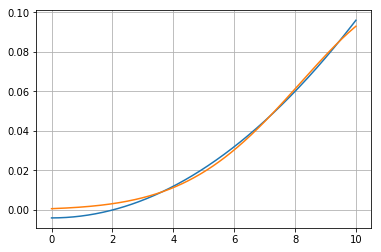

In [134]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm


def NormDist(x,m,s):
    return norm.pdf(x,m,s)

def f(x):
    return ((x**2) - 4)/1000       #Se escala la función como se mencionó         

X=np.linspace(0,10,1000)
val, cov  = curve_fit(NormDist,X,f(X))


plt.plot(X,f(X))
plt.plot(X,NormDist(X,val[0],val[1]))
plt.grid()
plt.show()

In [135]:
import random

N=1000000 

r=np.random.normal(val[0],val[1],N)  #Generamos los números aleatorios de acuerdo a la distribución
r=r[(r >= 0)&(r <= 10)]              #Seleccionamos aquellos en el intervalo de interés

J =(np.sum(f(r)/NormDist(r,*val)))*1000  #Se multiplica por 1000 porque la función que teníamos está dividida entre 
                                         #1000
I = J/N
print(I)

292.48705581200016


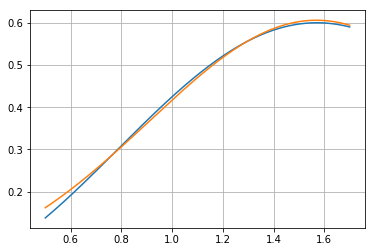

In [158]:
def s(x):
    return ((np.sin(x))**2)*0.6      #Se reescala    
 
def NormDist(x,m,s):
    return norm.pdf(x,m,s)

X = np.linspace(0.5,1.7,1000)

valo, cov  = curve_fit(NormDist,X,s(X))

plt.plot(X,s(X))
plt.plot(X,NormDist(X,valo[0],valo[1]))
plt.grid()
plt.show()

In [165]:
import random

N=1000000

J = 0
#15 números aleatorios entre 0 y 10

r=np.random.normal(val[0],val[1],N)
r=r[(r >= 0.5)&(r <= 1.7)]

J =(np.sum(s(r)/NormDist(r,*val)))/0.6        #Se quita el reescalamiento
I = J/N
print(I)


0.8660009598332591


Se ha obtenido:

$$I_1 = 292.487$$
$$I_2 = 0.8660$$

Los cuales son buenos resultados teniendo en cuenta que sus valores más precisos, teniendo en cuenta cálculos exactos (almenos simbolicamente)

$$I_{1 \ \text{exacto}} = 293.33333$$
$$I_{2 \ \text{exacto}} = 0.87425$$